### Encrypting the ghost image with one-time pad encryption

In [1]:
# https://www.quora.com/How-do-I-read-an-image-in-Python
from PIL import Image
jpgfile = Image.open("ghost.jpeg") #https://www.pinterest.com/pin/600808406515020776/
 
print(jpgfile.bits, jpgfile.size, jpgfile.format, jpgfile.mode)

8 (203, 248) JPEG RGB


With latest jupyter notebook, we can visualize the image inline using `display`

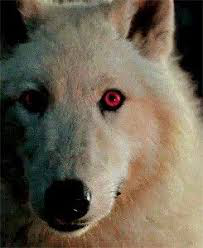

In [2]:
display(jpgfile)

### Coping and modifying the code from [the unbreakable encryption](https://github.com/NagaComBio/learning_ml_statistics/blob/master/classicCSProblemsinPython/Unbreakable_encryption.ipynb)

In [3]:
from typing import Tuple
from secrets import token_bytes

def random_key(length: int) -> int:
    """
    Generates the random byte using for input length
    and converts them to an integer.
    """
    random_byte: bytes = token_bytes(length)
    key_int: int = int.from_bytes(random_byte, "big")
    return key_int

def encrypte(pil_image) -> Tuple[int, int]:
    """
   Converts input string to bytes and to an integer. 
   Combines the original integer with a dummy integer to generate an integer, that's an encrypted string.
    """
    #original_byte = string.encode()
    original_byte = pil_image.tobytes()
    original_key:int = int.from_bytes(original_byte, "big")
    dummy_key:int = random_key(len(original_byte))
    
    encrypted_key = original_key ^ dummy_key
    
    return(encrypted_key, dummy_key)

# I have updated the fuction to recieve mode and size of the orginal image
def decrypte(key1:int, key2:int, mode, size):
    """
     Combines encrypted key and dummy key to generate decrypted integer, 
     and converts the decrypted integer to bytes and decodes it to the original string.
    """
    decrypted_key = key1 ^ key2
    decrypted_byte: bytes = decrypted_key.to_bytes((decrypted_key.bit_length() + 7) // 8, "big") # not sure why +7 
    
    #return(decrypted_byte.decode())
    # Have updated from string decode function to PIL Image.frombytes
    return(Image.frombytes(mode, size, decrypted_byte))

In [4]:
# Encrypting a string
encrypted_keys = encrypte(jpgfile)
# The encrypted key and random dummy key
#encrypted_keys

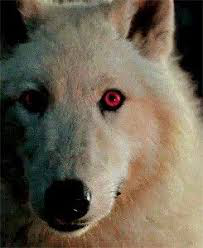

In [5]:
# Decrypting keys to original string
decrypte(encrypted_keys[0], encrypted_keys[1], jpgfile.mode, jpgfile.size)

Wow, thats cool. 
Now I am curious to check how encrypted image looks like.

In [6]:
def visual_encrypted_data(input_key:int, mode, size):
    decrypted_byte: bytes = input_key.to_bytes((input_key.bit_length() + 7) // 8, "big") # not sure why +7 
    
    #return(decrypted_byte.decode())
    return(Image.frombytes(mode, size, decrypted_byte))

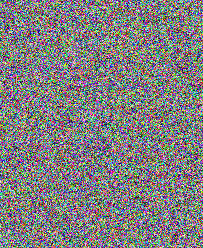

In [7]:
visual_encrypted_data(encrypted_keys[0], jpgfile.mode, jpgfile.size)

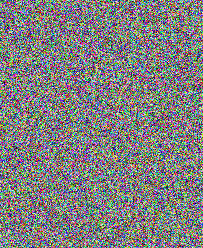

In [8]:
visual_encrypted_data(encrypted_keys[1], jpgfile.mode, jpgfile.size)

I can't find the ghost here.. That's cool.